In [3]:
import torch

##STEP 1. 데이터 만들기

In [4]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

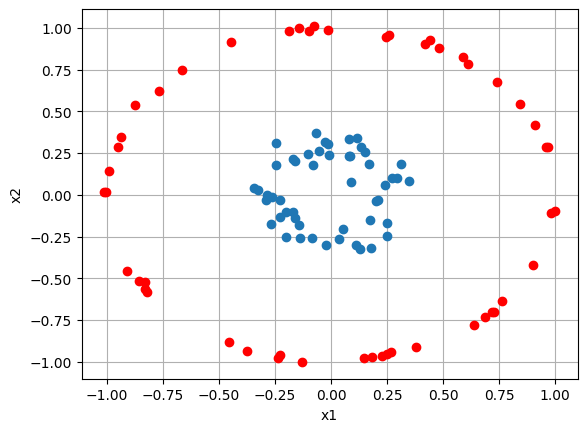

In [5]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP2. 모델 만들기

In [42]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1. plain
        self.linear = nn.Sequential(
            nn.Linear(2,100),
            nn.Sigmoid(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )

        # case 1. very simple
        self.linear = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()

        )

        # case 1. deep
        self.linear = nn.Sequential(
            nn.Linear(2,100),
            nn.Sigmoid(),
            nn.Linear(100,100),
            nn.Sigmoid(),
            nn.Linear(100,100),
            nn.Sigmoid(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )

        # case 2. plain
        self.linear = nn.Sequential(
            nn.Linear(2,100),
            nn.Sigmoid(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )

        # case 2. very simple
        self.linear = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()

        )

        # case 2. deep
        self.linear = nn.Sequential(
            nn.Linear(2,100),
            nn.Sigmoid(),
            nn.Linear(100,100),
            nn.Sigmoid(),
            nn.Linear(100,100),
            nn.Sigmoid(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )
        # case 2. very deep
        self.linear = nn.Sequential(
            nn.Linear(2,100),
            nn.Sigmoid(),
            *[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]],
            nn.Linear(100,1),
            nn.Sigmoid()
        )


    def forward(self,x):
        x = self.linear(x)
        return x

In [43]:
# nn.Sequential(*[nn.Linear(100,100) if i%2==0 else nn.Sigmoid() for i in range(10)])
# nn.Sequential(*[i for _ in range(5) for i in [nn.Linear(100,100), nn.Sigmoid()]])

In [44]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): ReLU()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): ReLU()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): ReLU()
    (18): Linear(in_features=100, out_features=100, bias=True)
    (19): ReLU()
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): ReLU()
    (22): Linear(in_features=100, out_features=1, bias=True)
    (23): Sigmoid()
  )
)
torch.Size([5

## STEP3 모델 학습시키기

In [45]:
print(X.shape)
print(y.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [46]:
from torch import optim
import torch.nn.functional as F

Epoch = 500 # case1
LR = 1e-1 # case1
LR = 1e-2 # case2
LR = 1e-4 # case2 verydeep RELU
# optimizer = optim.SGD(model.parameters(),lr=LR)
optimizer = optim.Adam(model.parameters(),lr=LR) # case1 deep
loss_history = []

model.train()
for ep in range(Epoch):
    y_hat = model(X)

    loss = F.binary_cross_entropy(y_hat,y)

    optimizer.zero_grad()

    loss.backward() # backpropagation

    optimizer.step() # weight update

    #print loss

    loss_history += [loss.item()]
    print(f"Epoch: {ep+1} | train_loss: {loss:.3f}")

Epoch: 1 | train_loss: 0.694
Epoch: 2 | train_loss: 0.694
Epoch: 3 | train_loss: 0.694
Epoch: 4 | train_loss: 0.693
Epoch: 5 | train_loss: 0.693
Epoch: 6 | train_loss: 0.693
Epoch: 7 | train_loss: 0.693
Epoch: 8 | train_loss: 0.693
Epoch: 9 | train_loss: 0.693
Epoch: 10 | train_loss: 0.693
Epoch: 11 | train_loss: 0.693
Epoch: 12 | train_loss: 0.693
Epoch: 13 | train_loss: 0.693
Epoch: 14 | train_loss: 0.693
Epoch: 15 | train_loss: 0.693
Epoch: 16 | train_loss: 0.693
Epoch: 17 | train_loss: 0.693
Epoch: 18 | train_loss: 0.693
Epoch: 19 | train_loss: 0.693
Epoch: 20 | train_loss: 0.693
Epoch: 21 | train_loss: 0.693
Epoch: 22 | train_loss: 0.693
Epoch: 23 | train_loss: 0.693
Epoch: 24 | train_loss: 0.693
Epoch: 25 | train_loss: 0.693
Epoch: 26 | train_loss: 0.693
Epoch: 27 | train_loss: 0.693
Epoch: 28 | train_loss: 0.693
Epoch: 29 | train_loss: 0.693
Epoch: 30 | train_loss: 0.693
Epoch: 31 | train_loss: 0.693
Epoch: 32 | train_loss: 0.693
Epoch: 33 | train_loss: 0.693
Epoch: 34 | train_l

In [47]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(3.2983e-05, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.2982e-05, grad_fn=<DivBackward0>)


In [48]:
# optimizer.zero_grad()를 써야하는 이유
x= torch.tensor([1.],requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)
    # x.grad = None

tensor([2.])
tensor([4.])


Text(0, 0.5, 'loss')

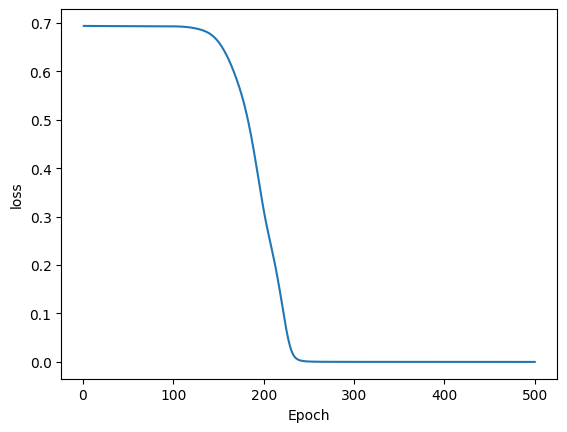

In [49]:
plt.plot(range(1,Epoch+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")

## STEP4. 모델 테스트 하기

Text(0.5, 0.5, 'x2')

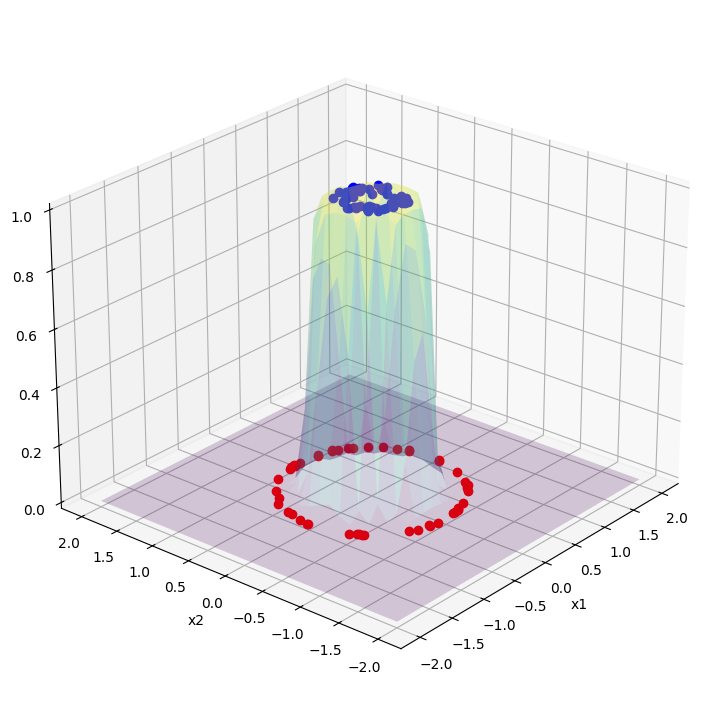

In [50]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
x1_test, x2_test = torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([x1_test.unsqueeze(dim=2), x2_test.unsqueeze(dim=2)], dim=2)
X_test.shape

model.eval() # test mode 로 # 1 해결
with torch.inference_mode(): # 2.해결
    y_hat = model(X_test)
    Y_hat = y_hat.squeeze()

# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 개선 <- 메모리가 불필요하게 쓰인다.
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(x1_test,x2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")